In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from datetime import datetime, timedelta


### 시장별 품목 확인
#### 시장 선정 - 등록된 가게가 많은 곳
데이터 구조: 지역 < 시장(market) < 가게(store)

In [2]:
file_path = "../data/raw/ikh_store_meta_2025-01-13.csv"
df = pd.read_csv(file_path, dtype={"store_id": str})
df


,s_query,market,store,store_id,comments,like,rating
0,노량진,노량진 1층,군산상회,0000000833,979,1688,4.9
1,노량진,노량진 1층,중앙꽃게,0000000005,2962,2726,4.7
2,노량진,노량진 2층,제주회수산,0000000822,1060,1907,4.9
3,노량진,노량진 1층,청양수산,0000000013,5329,7007,4.9
4,노량진,노량진 1층,영신수산,0000000006,3696,3773,4.8
...,...,...,...,...,...,...,...
442,울산,울산농수산물도매시장,거상수산,0000001347,0,6,0.0
443,울산,울산수암회수산시장,착한횟집,0000001253,3,6,3.0
444,울산,울산농수산물도매시장,산호수산,0000001422,7,20,5.0
445,울산,울산농수산물도매시장,울릉도횟집,0000000989,55,54,4.9


In [4]:
df_ref = df[~df.duplicated(subset=["store_id"])]  # 중복 제거
df_ref = df_ref[df_ref["comments"] >= 100]
market_counts = df_ref.groupby("market").count()["store_id"]

# count 값이 5 이상인 market 필터링
markets = market_counts[market_counts >= 5].sort_values(ascending=False)
# print(markets, '\ntotal:', markets.sum())
df_ftd = df_ref[df_ref["market"].isin(markets.index)]
df_ftd


,s_query,market,store,store_id,comments,like,rating
0,노량진,노량진 1층,군산상회,0000000833,979,1688,4.9
1,노량진,노량진 1층,중앙꽃게,0000000005,2962,2726,4.7
2,노량진,노량진 2층,제주회수산,0000000822,1060,1907,4.9
3,노량진,노량진 1층,청양수산,0000000013,5329,7007,4.9
4,노량진,노량진 1층,영신수산,0000000006,3696,3773,4.8
...,...,...,...,...,...,...,...
386,부산,부산민락어민활어직판장,수평선,0000000123,559,891,4.9
388,부산,부산민락어민활어직판장,카츠교,0000000338,790,794,4.9
390,부산,부산민락어민활어직판장,백년손님,0000000433,395,684,4.9
412,부산,부산민락어민활어직판장,대구택이네,0000000388,103,122,4.9


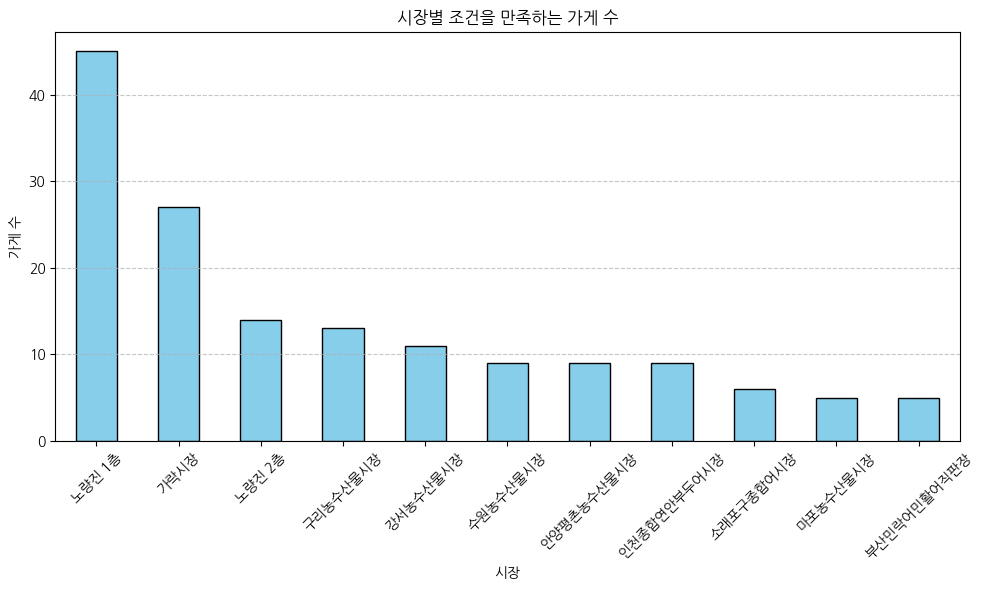

총 가게 수: 153


In [5]:
plt.figure(figsize=(10, 6))
markets.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("시장별 조건을 만족하는 가게 수")
plt.xlabel("시장")
plt.ylabel("가게 수")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Markets 데이터 총합 출력
print("총 가게 수:", markets.sum())

시장 선정 - 리뷰가 100건 이상 등록된 가게가 5개 이상인 시장
(리뷰가 많을수록 오래되고, 데이터가 많고, 인어교주해적단 가격 시스템을 잘 이해하고 있을 것이라고 가정)

- 노량진 1층
- 가락시장
- 노량진 2층
- 구리농수산물시장
- 강서농수산물시장
- 수원농수산물시장
- 안양평촌농수산물시장
- 인천종합연안부두어시장
- 소래포구종합어시장
- 마포농수산물시장
- 부산민락어민활어직판장

-> 11개 시장 153 가게 대상

-> 해당 가게들에서 주로 파는 품목 확인

In [ ]:
# output_file = f"../data/processed/ikh_store_meta_2025-01-13.csv"
# df_ftd.to_csv(output_file, index=False, encoding="utf-8")

#### 품목 선정 - 선정된 가게에서 주로 판매하는 품목

In [7]:
file_path = "../data/raw/ikh_store_item_2025-01-14.csv"
df = pd.read_csv(file_path, dtype={"store_id": str})
df.head()
# TODO: baseId, labelId, itemCategoryId 의 의미 파악 필요

,store_id,store,itemId,baseId,labelId,itemCategoryId,itemCategoryName,species,itemName,alias,...,sizeDesc,sizeCriteria,quality,orderNo,priceDate,salesUnitQuantity,finalPrice,originPrice,discountPrice,discountRatio
0,0000000833,군산상회,2,184,49,38,생선/횟감,NaN,광어,NaN,...,중,1~2kg미만,NaN,0,2025-01-13,1,0,35000,0,0
1,0000000833,군산상회,3,184,49,38,생선/횟감,NaN,광어,NaN,...,대,2~3kg미만,NaN,0,2025-01-13,1,0,40000,0,0
2,0000000833,군산상회,561,184,49,38,생선/횟감,NaN,광어,NaN,...,특대,3~4kg미만,NaN,0,2025-01-13,1,0,50000,0,0
3,0000000833,군산상회,3771,643,192,38,생선/횟감,NaN,방어,NaN,...,특대,10kg이상,NaN,0,2025-01-13,1,0,45000,0,0
4,0000000833,군산상회,3774,647,192,38,생선/횟감,NaN,방어,NaN,...,소,1~4kg미만,NaN,0,2025-01-13,1,0,35000,0,0


### 가격 변동 확인
품목별 데이터가 얼마나 있는지를 확인한 후 품목 결정

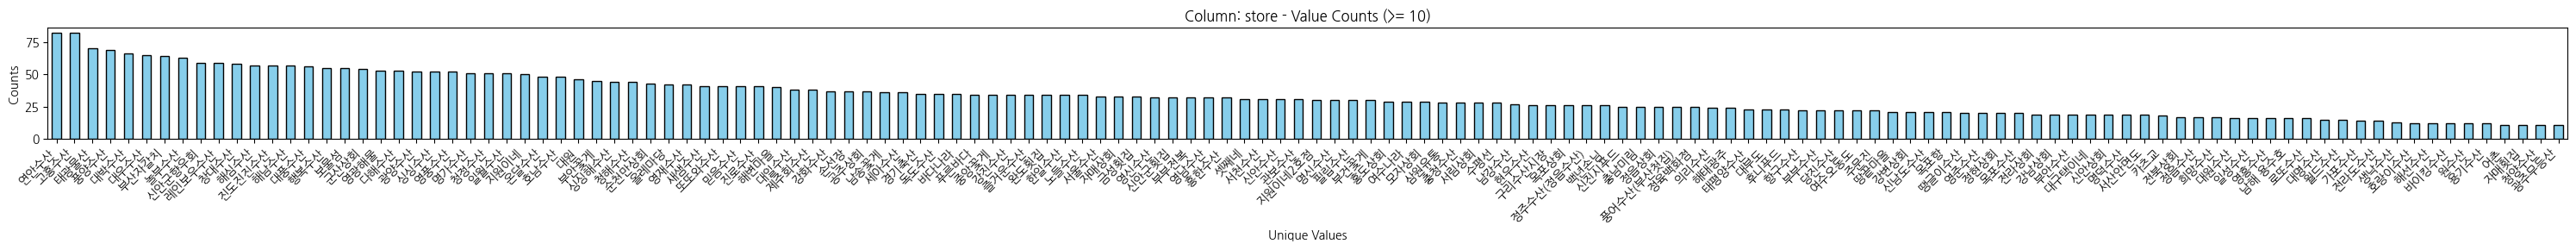

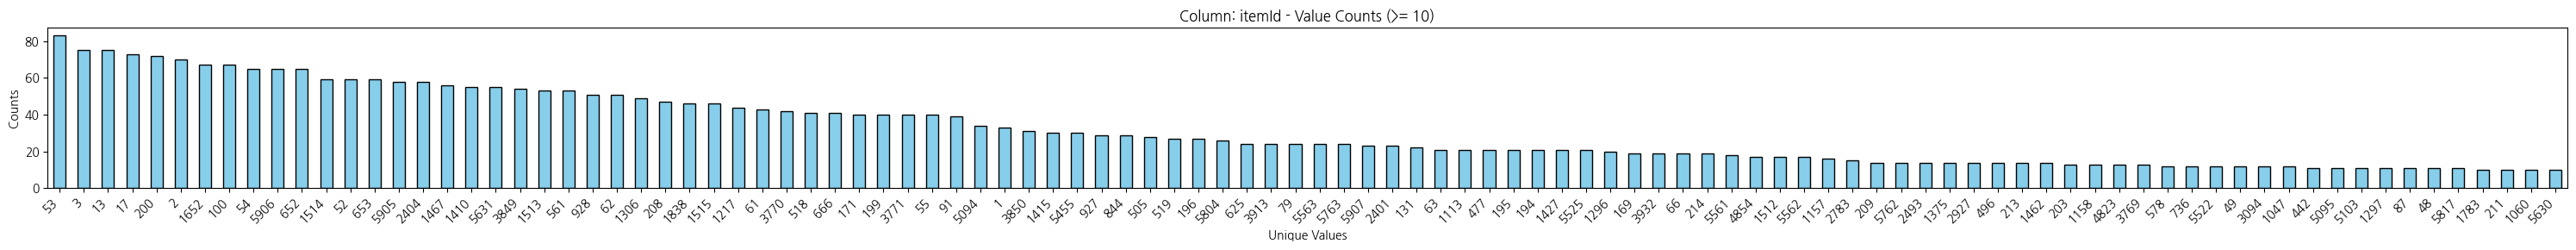

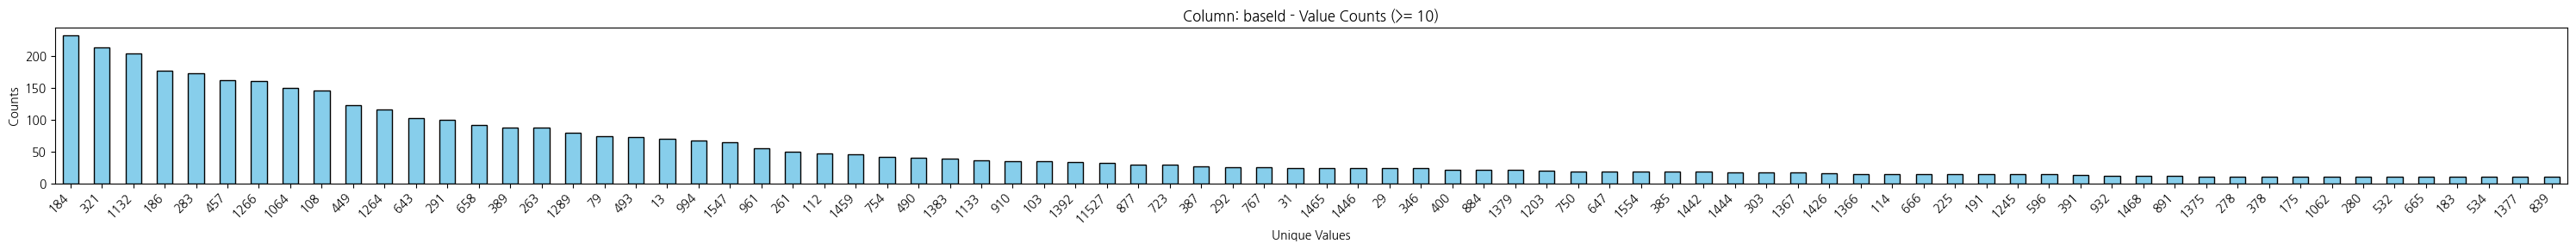

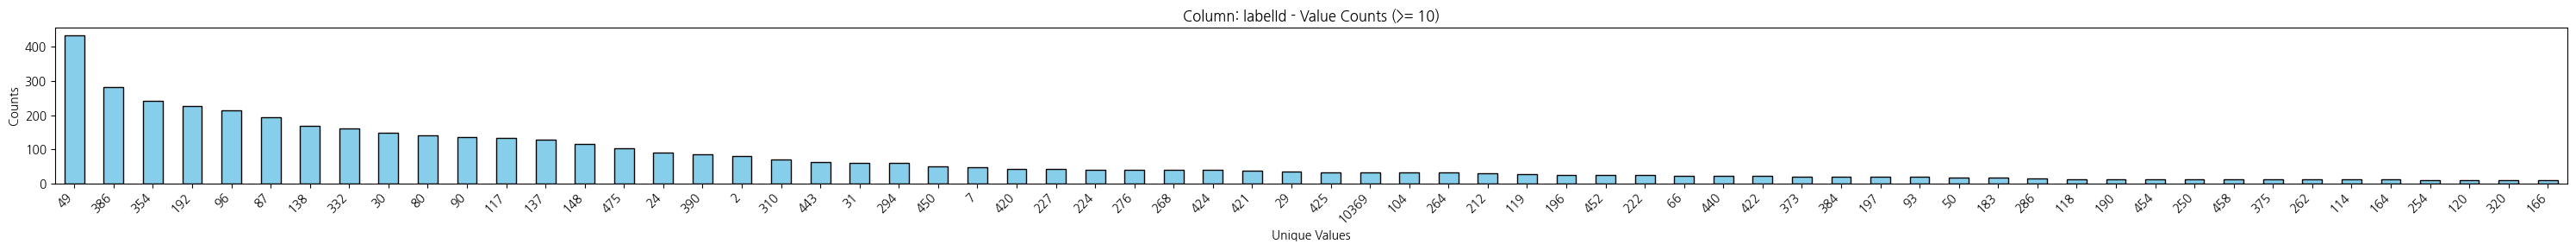

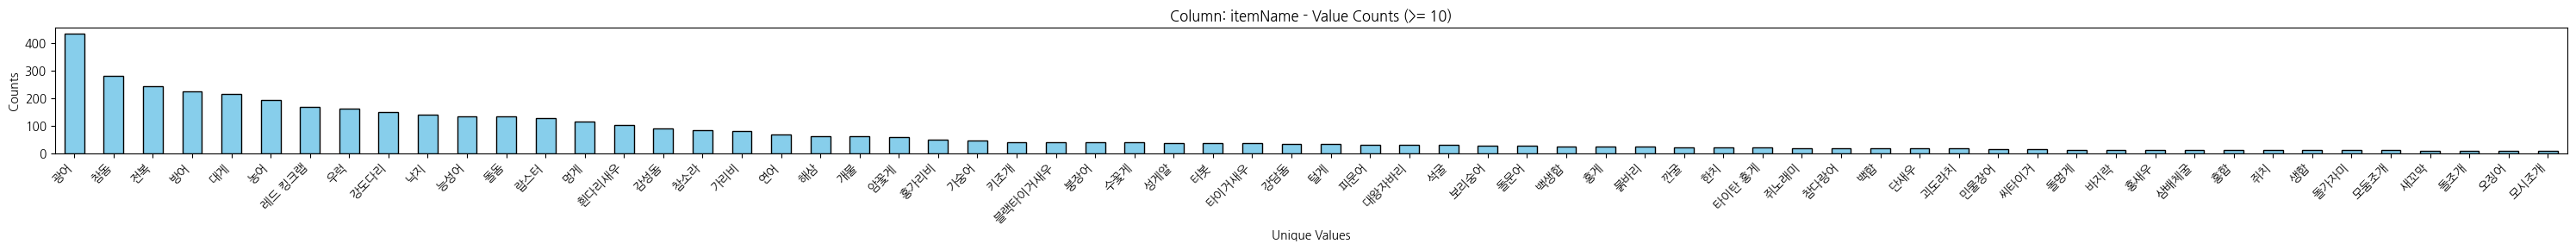

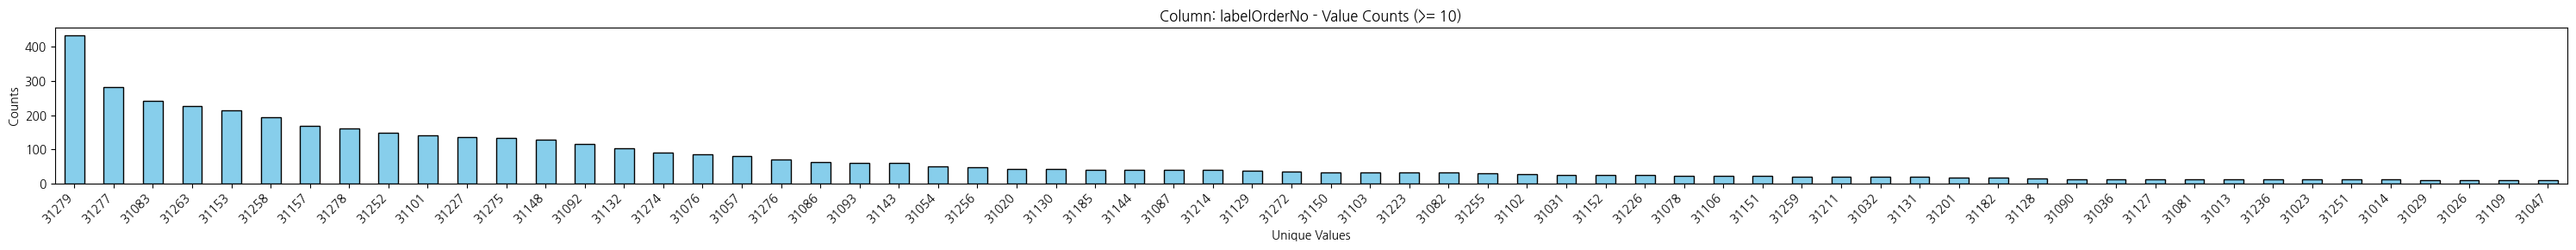

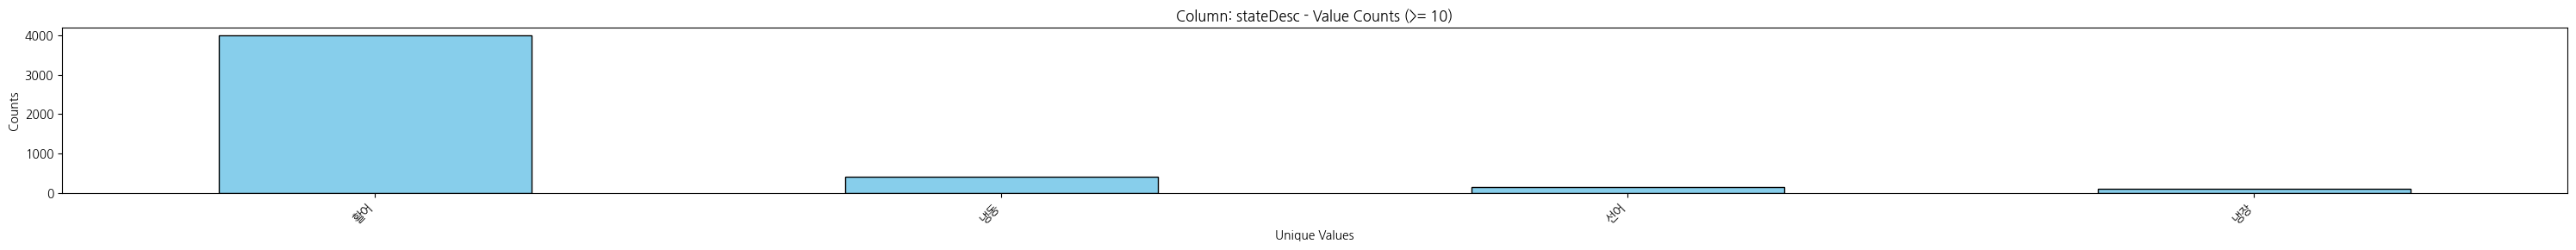

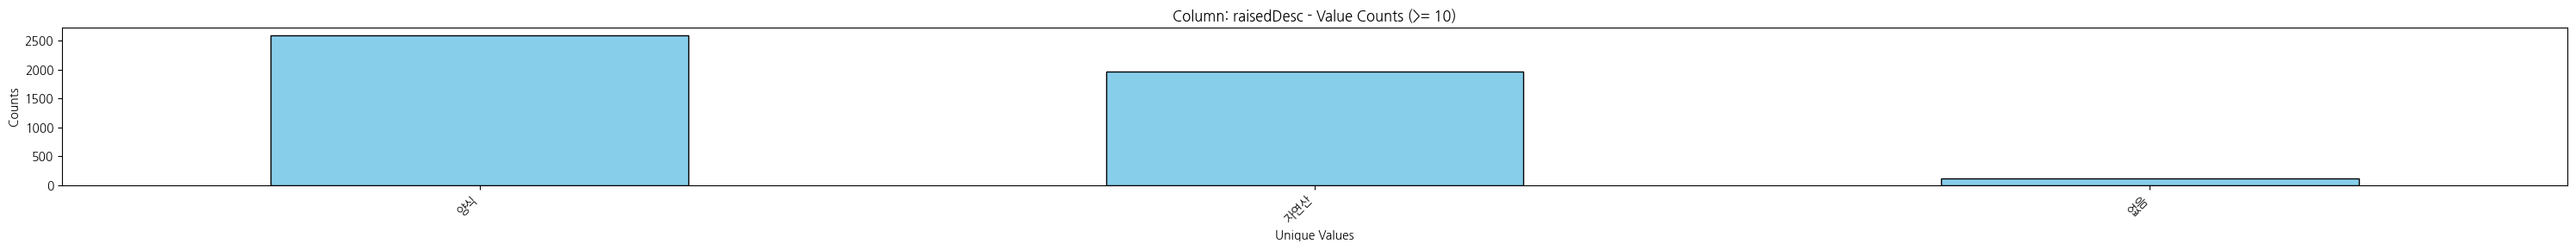

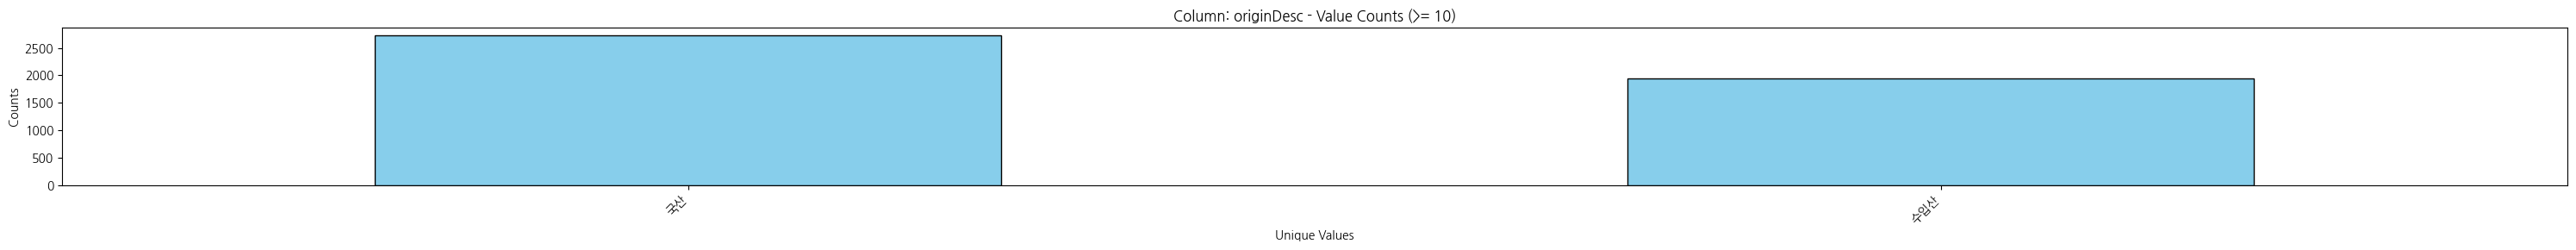

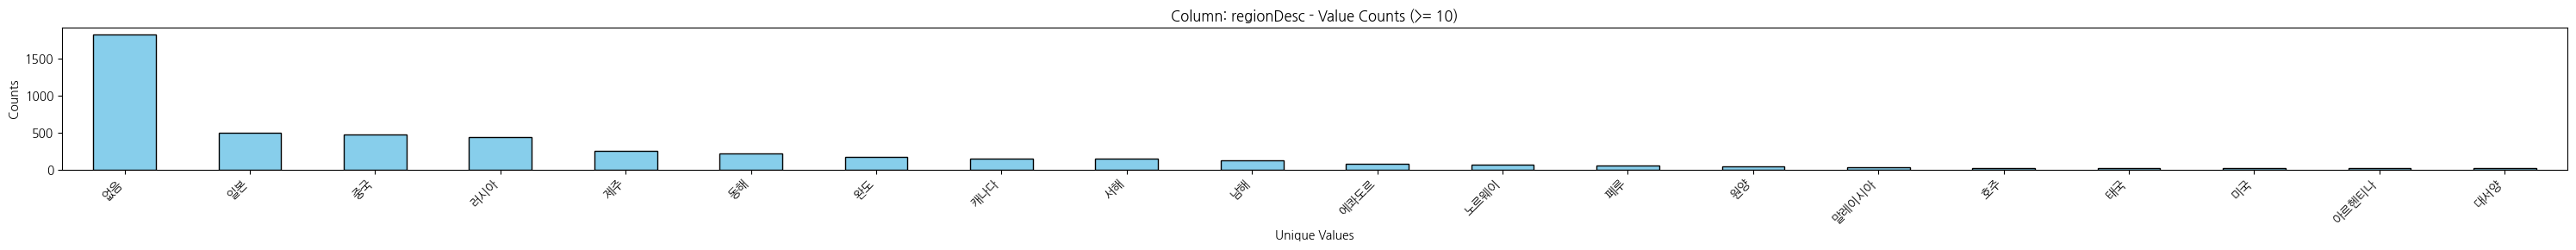

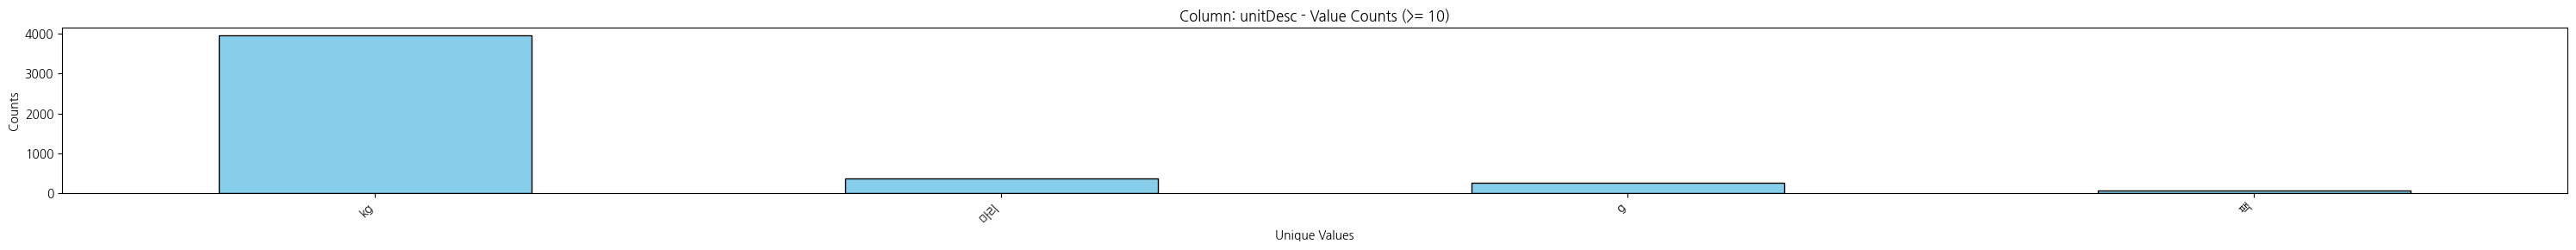

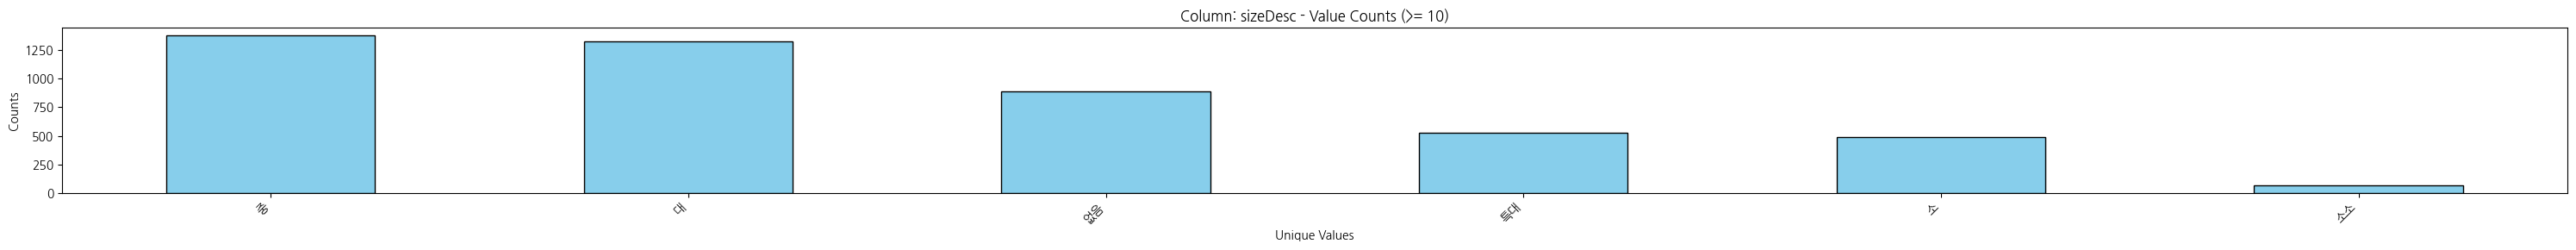

In [8]:
# 컬럼별 고유 항목 수 확인 및 시각화
columns = ['store', 'itemId', 'baseId', 'labelId', 'itemName', 'labelOrderNo',
           'stateDesc', 'raisedDesc', 'originDesc', 'regionDesc', 'unitDesc', 'sizeDesc']
# for column in df.columns:
for column in columns:
    # 항목별 개수 계산
    value_counts = df[column].value_counts()
    
    # Value Count가 10 이상인 항목만 필터링
    value_counts_filtered = value_counts[value_counts >= 10]
    
    # 조건을 만족하는 항목이 있을 때만 시각화
    if not value_counts_filtered.empty:
    # if not value_counts.empty:
        plt.figure(figsize=(30, 3))
        value_counts_filtered.plot(kind="bar", color="skyblue", edgecolor="black")
        plt.title(f"Column: {column} - Value Counts (>= 10)")
        # value_counts.plot(kind="bar", color="skyblue", edgecolor="black")        
        # plt.title(f"Column: {column} - Value Counts")
        plt.xlabel("Unique Values")
        plt.ylabel("Counts")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()

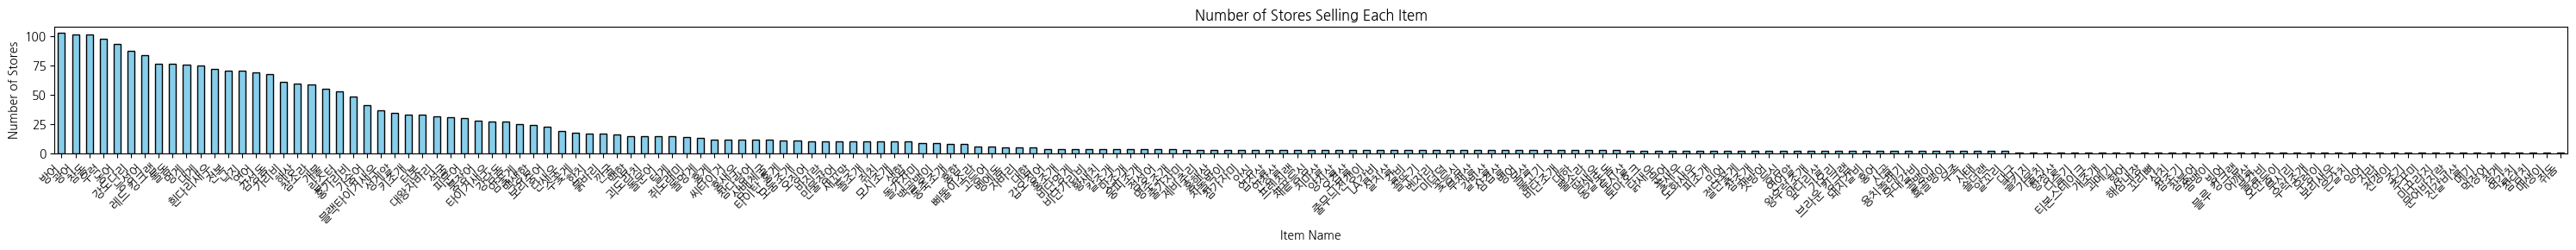

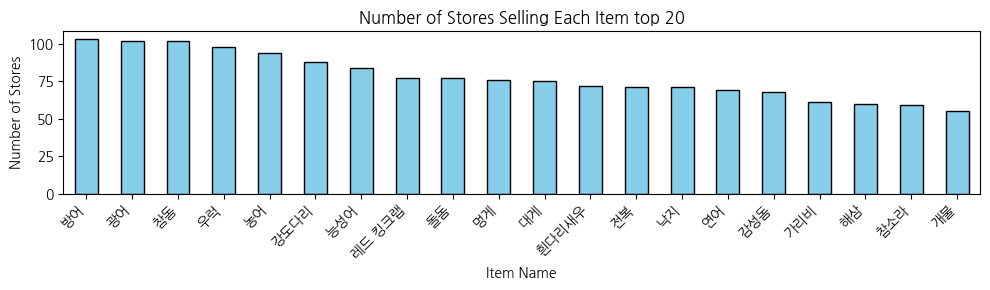

In [9]:
# 품목별 판매중인 가게 수 확인
# itemName별 store_id의 고유 개수 계산
item_store_count = df.groupby("itemName")["store_id"].nunique()

item_store_count_df = item_store_count.reset_index()
item_store_count_df.columns = ["itemName", "store_count"]

item_store_count_sorted = item_store_count.sort_values(ascending=False)
item_store_count_sorted.plot(kind="bar", figsize=(30, 3), color="skyblue", edgecolor="black")
plt.title("Number of Stores Selling Each Item")
plt.xlabel("Item Name")
plt.ylabel("Number of Stores")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

item_store_count_sorted[:20].plot(kind="bar", figsize=(10, 3), color="skyblue", edgecolor="black")
plt.title("Number of Stores Selling Each Item top 20")
plt.xlabel("Item Name")
plt.ylabel("Number of Stores")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


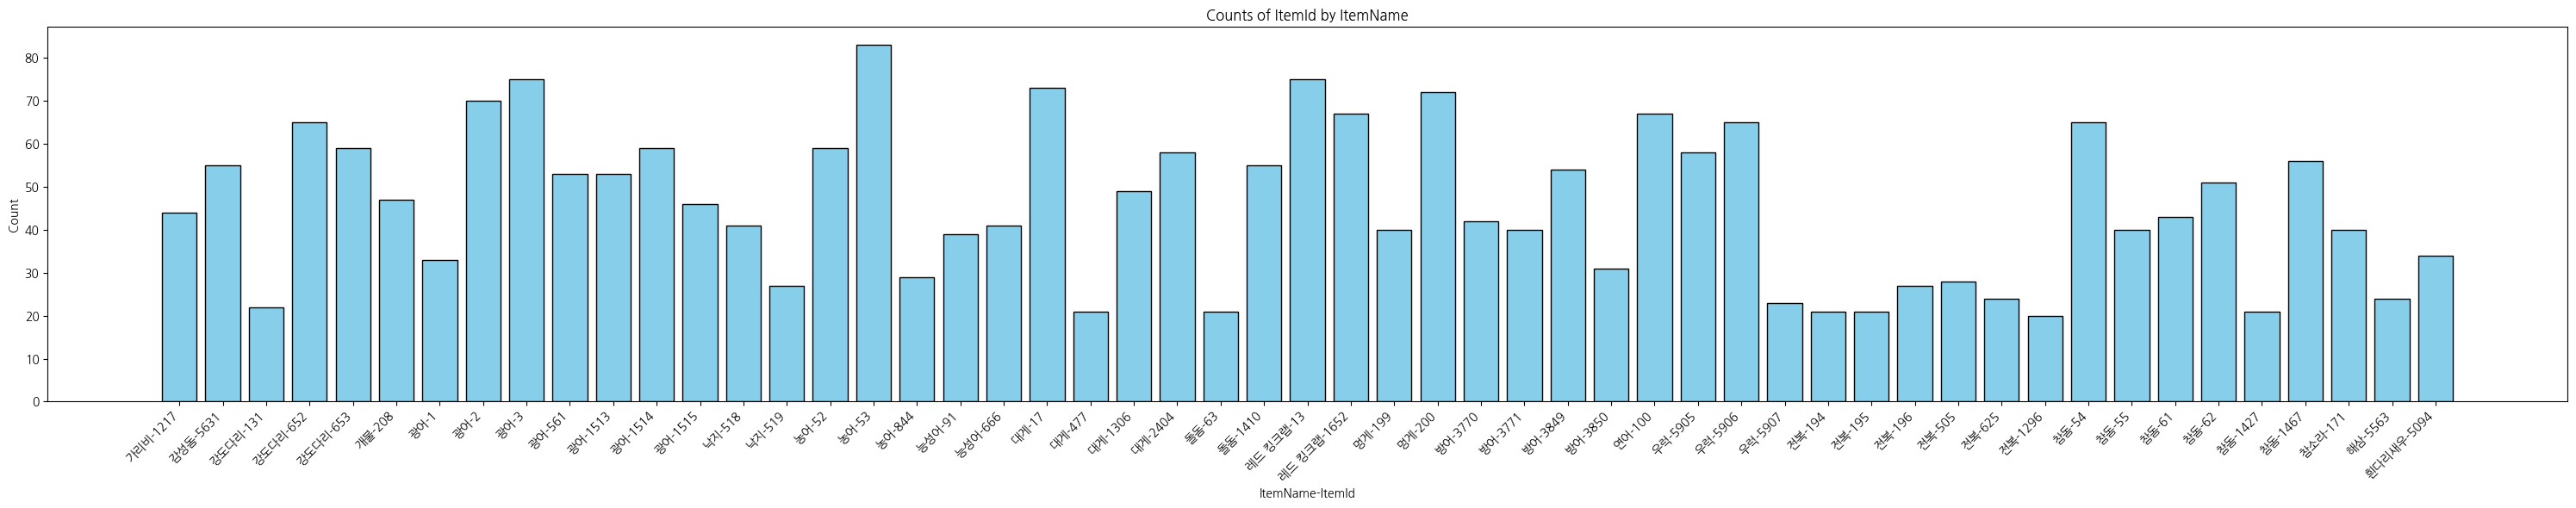

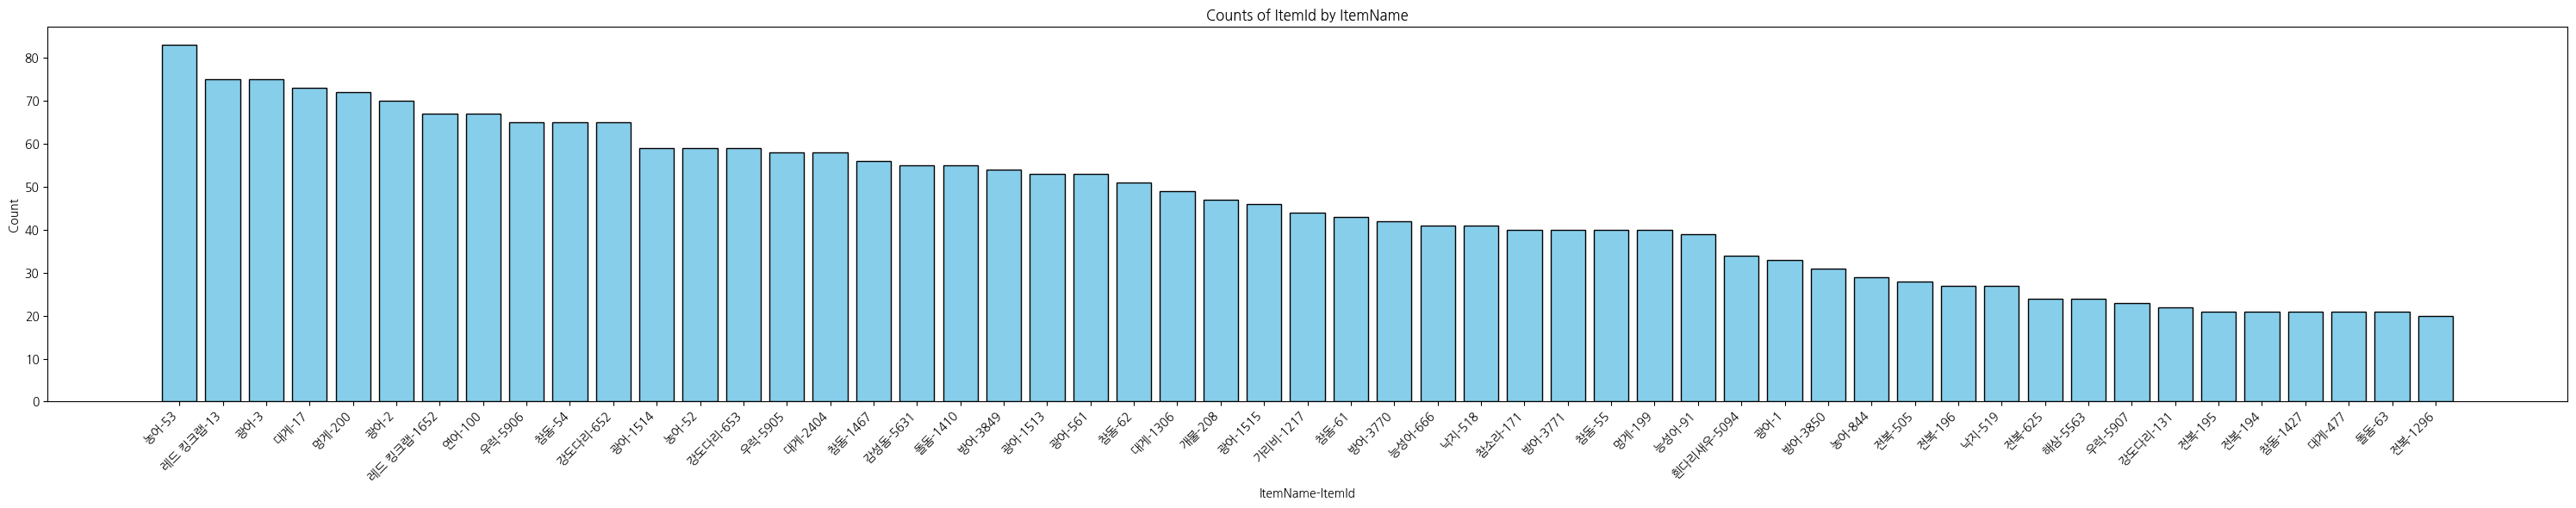

In [10]:
# 품목별 세부품목 수 확인
top_20_item_names = item_store_count_sorted[:20].index

# 상위 20개 itemName에 대한 데이터 필터링
filtered_df = df[df["itemName"].isin(top_20_item_names)]

# itemId별 count와 itemName 정보 확인
item_id_counts = filtered_df.groupby(["itemName", "itemId"]).size().reset_index(name="count")

# itemName-itemId 형식으로 라벨 생성
item_id_counts["label"] = item_id_counts["itemName"] + "-" + item_id_counts["itemId"].astype(str)

item_id_counts = item_id_counts[item_id_counts["count"] >= 20]
# 시각화
plt.figure(figsize=(30, 6))
plt.bar(item_id_counts["label"], item_id_counts["count"], color="skyblue", edgecolor="black")
plt.title("Counts of ItemId by ItemName")
plt.xlabel("ItemName-ItemId")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

item_id_counts = item_id_counts.sort_values(by="count", ascending=False)
plt.figure(figsize=(30, 6))
plt.bar(item_id_counts["label"], item_id_counts["count"], color="skyblue", edgecolor="black")
plt.title("Counts of ItemId by ItemName")
plt.xlabel("ItemName-ItemId")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



- 기존: 광어, 방어, 연어, 참돔, 대게, 가리비
- 변경: 농어(53), 광어(3), 대게(17), 연어(100), 우럭(5906), 참돔(54), 방어(3849)

In [44]:
file_path = "../data/raw/ikh_store_item_2025-01-14.csv"
df = pd.read_csv(file_path, dtype={"store_id": str})
print(df[df["itemId"] == 100][['itemId', 'baseId', 'labelId', 'salesUnitQuantity', 'originPrice', 'discountPrice']])
df_ref = df[["itemId", "itemName", "stateDesc", "raisedDesc", "originDesc", "regionDesc", "salesUnitQuantity", "unitDesc", "sizeDesc", "sizeCriteria"]]

df_ref.loc[df_ref["itemId"] == 100, "sizeCriteria"] = "없음"  # 연어 null값 처리
print(df_ref[df_ref["itemId"] == 100])
df_item_info = df_ref.groupby("itemId").value_counts().reset_index(name="counts")
df_item_info.rename(columns={"counts": "storeCount"}, inplace=True)
# output_file = f"../data/processed/ikh_item_info_2025-01-14.csv"
# df_item_info.to_csv(output_file, index=False, encoding="utf-8")
df_item_info

      itemId  baseId  labelId  salesUnitQuantity  originPrice  discountPrice
17       100     994      310                600         5840              0
100      100     994      310                600         6670              0
128      100     994      310                600         8340              0
206      100     994      310                600         5840              0
232      100     994      310                500        10000              0
...      ...     ...      ...                ...          ...            ...
4212     100     994      310                600         8000              0
4289     100     994      310                600         8340              0
4330     100     994      310                600         6670              0
4381     100     994      310                600        10000              0
4424     100     994      310                100         8000              0

[67 rows x 6 columns]
      itemId itemName stateDesc raisedDesc originDesc

,itemId,itemName,stateDesc,raisedDesc,originDesc,regionDesc,salesUnitQuantity,unitDesc,sizeDesc,sizeCriteria,storeCount
0,1,광어,활어,양식,국산,제주,1,kg,소,500g~1kg미만,33
1,2,광어,활어,양식,국산,제주,1,kg,중,1~2kg미만,70
2,3,광어,활어,양식,국산,제주,1,kg,대,2~3kg미만,75
3,13,레드 킹크랩,활어,자연산,수입산,러시아,1,kg,중,2~3kg미만,75
4,17,대게,활어,자연산,수입산,러시아,1,kg,대,1.2~1.5kg미만,73
...,...,...,...,...,...,...,...,...,...,...,...
314,20183,민어,선어,자연산,국산,서해,1,마리,소,1~3kg미만,1
315,20220,붉바리,활어,양식,국산,남해,1,kg,중,1~2kg미만,1
316,20249,레드 킹크랩,활어,자연산,수입산,러시아,1,kg,특대,4kg이상,9
317,20273,랍스터,활어,자연산,수입산,캐나다,1,kg,특대,4kg이상,7


In [54]:
file_path = "../data/processed/ikh_item_info_2025-01-14.csv"
df = pd.read_csv(file_path, dtype={"store_id": str})
df.head()

df[df["itemId"].isin([53, 3, 17, 100, 5906, 54, 3849, 3770]) & df["salesUnitQuantity"].isin([1, 600])]


,itemId,itemName,stateDesc,raisedDesc,originDesc,regionDesc,salesUnitQuantity,unitDesc,sizeDesc,sizeCriteria,storeCount
2,3,광어,활어,양식,국산,제주,1,kg,대,2~3kg미만,75
4,17,대게,활어,자연산,수입산,러시아,1,kg,대,1.2~1.5kg미만,73
11,53,농어,활어,양식,수입산,중국,1,kg,대,2~3kg미만,83
12,54,참돔,활어,양식,수입산,일본,1,kg,대,2~3kg미만,65
34,100,연어,선어,양식,수입산,노르웨이,600,g,없음,없음,52
214,3770,방어,활어,자연산,국산,동해,1,kg,대,8~10kg미만,42
223,3849,방어,활어,양식,수입산,일본,1,kg,중,4~8kg미만,54
295,5906,우럭,활어,양식,국산,없음,1,kg,중,500g~1kg미만,65


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from datetime import datetime, timedelta

file_path = "../data/raw/ikh_item_price_2025-01-19.csv"
df = pd.read_csv(file_path)
df["priceDate"] = pd.to_datetime(df["priceDate"])

df.head()

,priceDate,minPrice,avgPrice,maxPrice,item,market
0,2015-03-06,20000,20000,20000,농어,노량진 1층
1,2015-03-14,25000,25000,25000,농어,노량진 1층
2,2015-04-18,25000,27500,30000,농어,노량진 1층
3,2015-04-28,25000,25000,25000,농어,노량진 1층
4,2015-05-18,25000,25000,25000,농어,노량진 1층


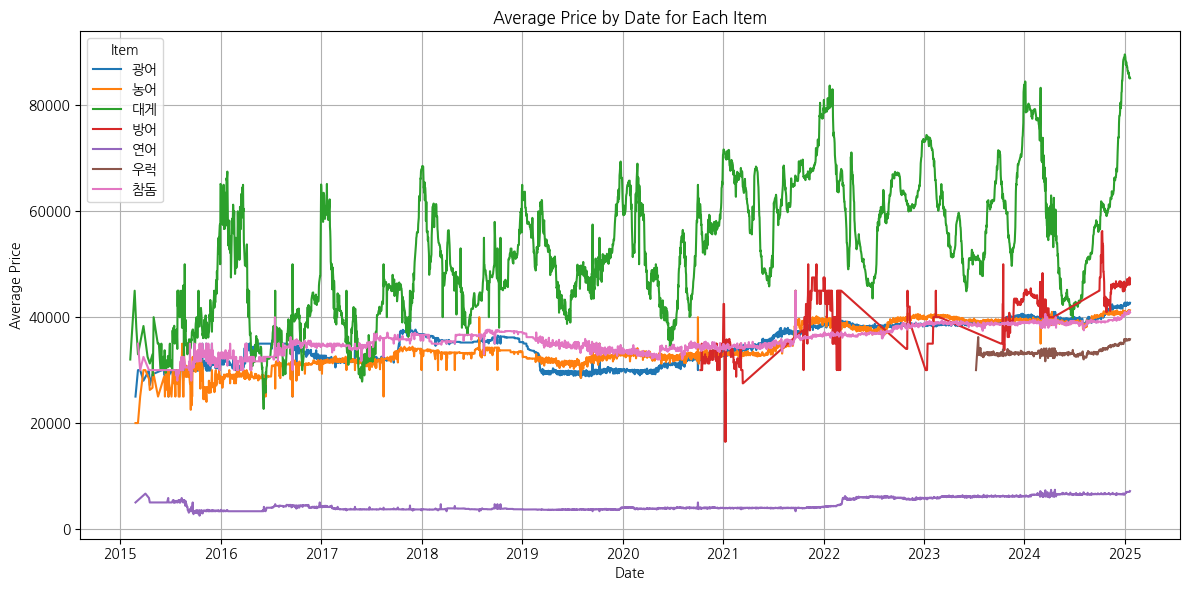

In [2]:
# 그룹화하여 아이템별, 날짜별 평균 가격 계산
avg_price_by_item_date = df.groupby(["item", "priceDate"])["avgPrice"].mean().reset_index()

# 아이템별 시각화
plt.figure(figsize=(12, 6))
for item in avg_price_by_item_date["item"].unique():
    item_data = avg_price_by_item_date[avg_price_by_item_date["item"] == item]
    plt.plot(item_data["priceDate"], item_data["avgPrice"], label=item)

# 그래프 꾸미기
plt.title("Average Price by Date for Each Item")
plt.xlabel("Date")
plt.ylabel("Average Price")
plt.legend(title="Item")
plt.grid()
plt.tight_layout()
plt.show()


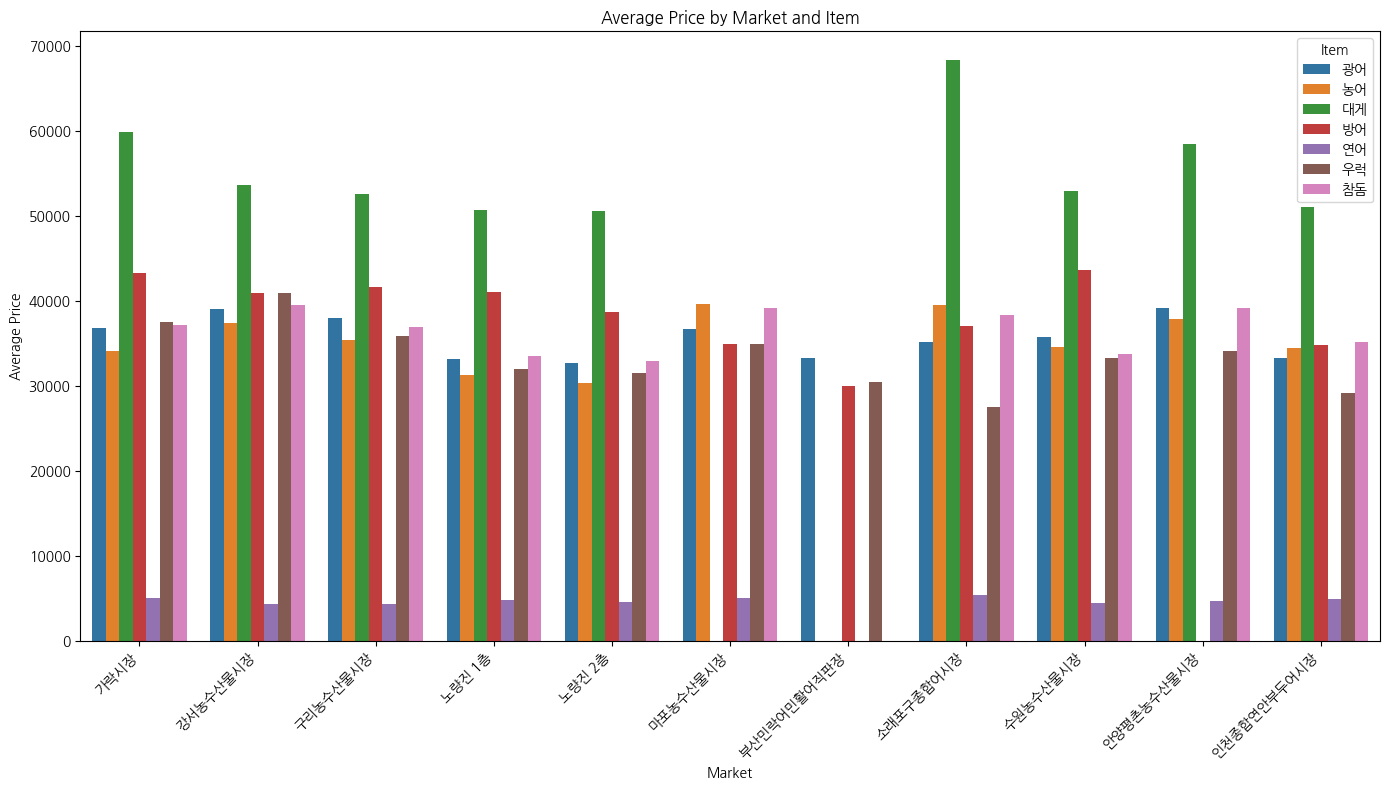

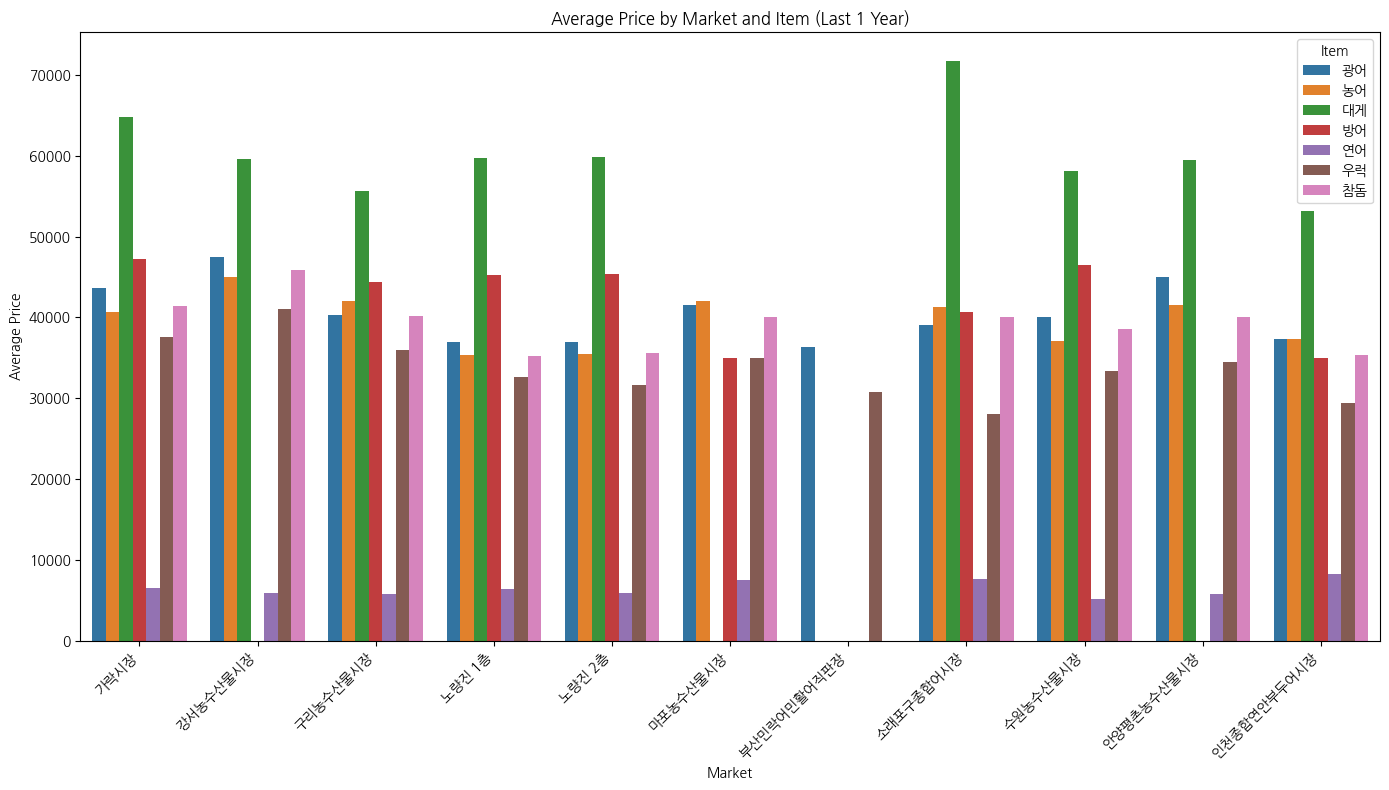

In [3]:
# 평균 가격 계산
avg_price_by_item_market = df.groupby(["item", "market"])["avgPrice"].mean().reset_index()

# 아이템별 시장별 평균 가격 시각화
plt.figure(figsize=(14, 8))
sns.barplot(
    x="market", 
    y="avgPrice", 
    hue="item", 
    data=avg_price_by_item_market,
    estimator=lambda x: x.mean(),
    dodge=True
)

# 그래프 꾸미기
plt.title("Average Price by Market and Item")
plt.xlabel("Market")
plt.ylabel("Average Price")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Item")
plt.tight_layout()
plt.show()



# 현재 날짜 기준으로 최근 1년 데이터 필터링
one_year_ago = datetime.now() - timedelta(days=365)
df["priceDate"] = pd.to_datetime(df["priceDate"])  # priceDate를 datetime 형식으로 변환
recent_data = df[df["priceDate"] >= one_year_ago]

# 평균 가격 계산 (최근 1년 데이터 사용)
avg_price_by_item_market = recent_data.groupby(["item", "market"])["avgPrice"].mean().reset_index()

# 아이템별 시장별 평균 가격 시각화
plt.figure(figsize=(14, 8))
sns.barplot(
    x="market", 
    y="avgPrice", 
    hue="item", 
    data=avg_price_by_item_market,
    estimator=lambda x: x.mean(),
    dodge=True
)

# 그래프 꾸미기
plt.title("Average Price by Market and Item (Last 1 Year)")
plt.xlabel("Market")
plt.ylabel("Average Price")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Item")
plt.tight_layout()
plt.show()

In [ ]:
# # 시장별 평균 가격 비교
# plt.figure(figsize=(12, 6))
# sns.barplot(x="market", y="avgPrice", data=df, estimator=lambda x: x.mean())
# plt.title("Average Price by Market")
# plt.xlabel("Market")
# plt.ylabel("Average Price")
# plt.xticks(rotation=45)
# plt.show()

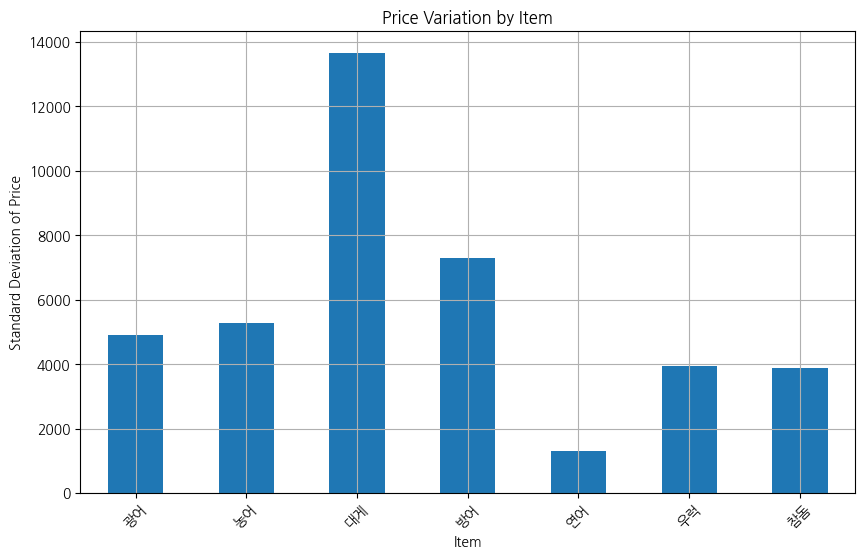

In [4]:
# 품목별 가격 변동성 확인
price_variation = df.groupby("item")["avgPrice"].std()

plt.figure(figsize=(10, 6))
price_variation.plot(kind="bar", title="Price Variation by Item")
plt.ylabel("Standard Deviation of Price")
plt.xlabel("Item")
plt.xticks(rotation=45)
plt.grid()
plt.show()

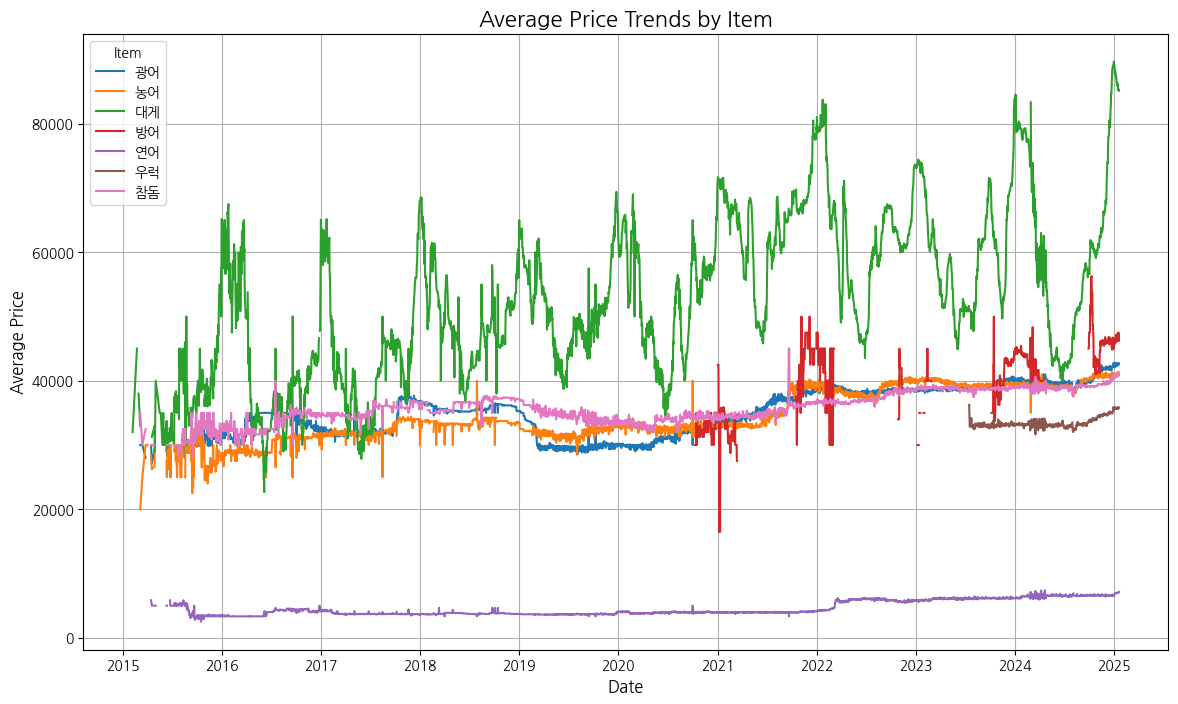

In [5]:
# 품목별 평균 가격 계산
item_price_trend = df.groupby(["priceDate", "item"])["avgPrice"].mean().unstack()

# 품목별 시간에 따른 가격 변화 플롯
plt.figure(figsize=(14, 8))
for column in item_price_trend.columns:
    plt.plot(item_price_trend.index, item_price_trend[column], label=column)

plt.title("Average Price Trends by Item", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.legend(title="Item", fontsize=10)
plt.grid()
plt.show()

In [6]:
# 전체 날짜 범위 생성
date_range = pd.date_range(start=df["priceDate"].min(), end=df["priceDate"].max())
print(f"전체날짜: {len(date_range)}")

# 품목별 누락된 날짜 찾기
missing_dates = {}

for item in df["item"].unique():
    # 해당 품목의 날짜 데이터
    item_dates = df[df["item"] == item]["priceDate"]
    
    # 누락된 날짜 계산
    missing_dates[item] = date_range.difference(item_dates)

# 누락된 날짜 출력
for item, dates in missing_dates.items():
    print(f"품목: {item} / \t누락된 날짜 수: {len(dates)}")


전체날짜: 3636
품목: 농어 / 	누락된 날짜 수: 385
품목: 광어 / 	누락된 날짜 수: 384
품목: 대게 / 	누락된 날짜 수: 318
품목: 연어 / 	누락된 날짜 수: 368
품목: 우럭 / 	누락된 날짜 수: 3085
품목: 참돔 / 	누락된 날짜 수: 395
품목: 방어 / 	누락된 날짜 수: 2979


In [53]:
print(f"전체날짜: {len(date_range)}")

# 품목-시장별 누락된 날짜 계산
missing_data = []
for (item, market), group in df.groupby(["item", "market"]):
    # 해당 품목-시장의 날짜 데이터
    item_market_dates = group["priceDate"]
    # 누락된 날짜 계산
    missing_dates = date_range.difference(item_market_dates)
    missing_count = len(missing_dates)
    
    # 결과 저장
    missing_data.append({"Item": item, "Market": market, "Missing Count": missing_count})
    
    # 누락된 날짜 출력
    print(f"품목: {item}, 시장: {market} / \t누락된 날짜 수: {missing_count}")


# DataFrame 생성
missing_df = pd.DataFrame(missing_data)


전체날짜: 3633
품목: 광어, 시장: 가락시장 / 	누락된 날짜 수: 422
품목: 광어, 시장: 강서농수산물시장 / 	누락된 날짜 수: 576
품목: 광어, 시장: 구리농수산물시장 / 	누락된 날짜 수: 1556
품목: 광어, 시장: 노량진 1층 / 	누락된 날짜 수: 452
품목: 광어, 시장: 노량진 2층 / 	누락된 날짜 수: 1523
품목: 광어, 시장: 마포농수산물시장 / 	누락된 날짜 수: 586
품목: 광어, 시장: 부산민락어민활어직판장 / 	누락된 날짜 수: 771
품목: 광어, 시장: 소래포구종합어시장 / 	누락된 날짜 수: 1468
품목: 광어, 시장: 수원농수산물시장 / 	누락된 날짜 수: 1829
품목: 광어, 시장: 안양평촌농수산물시장 / 	누락된 날짜 수: 2245
품목: 광어, 시장: 인천종합연안부두어시장 / 	누락된 날짜 수: 1390
품목: 농어, 시장: 가락시장 / 	누락된 날짜 수: 424
품목: 농어, 시장: 강서농수산물시장 / 	누락된 날짜 수: 679
품목: 농어, 시장: 구리농수산물시장 / 	누락된 날짜 수: 758
품목: 농어, 시장: 노량진 1층 / 	누락된 날짜 수: 442
품목: 농어, 시장: 노량진 2층 / 	누락된 날짜 수: 1467
품목: 농어, 시장: 마포농수산물시장 / 	누락된 날짜 수: 715
품목: 농어, 시장: 소래포구종합어시장 / 	누락된 날짜 수: 1149
품목: 농어, 시장: 수원농수산물시장 / 	누락된 날짜 수: 1708
품목: 농어, 시장: 안양평촌농수산물시장 / 	누락된 날짜 수: 1264
품목: 농어, 시장: 인천종합연안부두어시장 / 	누락된 날짜 수: 1622
품목: 대게, 시장: 가락시장 / 	누락된 날짜 수: 414
품목: 대게, 시장: 강서농수산물시장 / 	누락된 날짜 수: 1028
품목: 대게, 시장: 구리농수산물시장 / 	누락된 날짜 수: 508
품목: 대게, 시장: 노량진 1층 / 	누락된 날짜 수: 506
품목: 대게, 시장: 노량진 2층 / 	누락된 날짜 수: 79

- 우럭: 23년 이전 데이터가 없음
- 방어(일본산 양식 방어(중)): 20년 이전 데이터가 없음 + 여름 데이터 없음
- 방어2(국산 자연산 방어(대)): 20년 이전 데이터가 없음 + 여름 데이터 없음

- 품목의 시세가 메뉴의 가격에 영향을 주는지 확인
    -> 시간별 메뉴 가격 수집 후 진행
    - 메뉴 가격을 종속변수로 머신러닝 모델 생성하는 방안 고려

todo: Null값 처리 - 데이터가 존재하는 과거의 가장 최근 가격 또는 없는데로 진행

- 방어의 경우 동일 어종의 다른 품목 확인하였으나 비슷함
